<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 7.4 MB/s eta 0:00:00


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 55.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826312 sha256=13a37761d97bb976d835590cabbcfebbafe492530784bd10903eac480a690437
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9437405 sha256=2bd9f6163f85faeadbea54f9c79cfec21fa8e1f2f692a47fe9d59cfa70f69a05
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988

In [ ]:
import pyupbit

In [614]:
import pyupbit
import pandas as pd
import time

# Upbit API로 데이터 가져오기
df = pyupbit.get_ohlcv("KRW-MLK", interval="minute60", count=370)

# 인덱스를 날짜/시간 형식으로 변환
df.index = pd.to_datetime(df.index, format="%Y-%m-%d %H:%M:%S")

# 데이터프레임 출력
print(df)

                      open   high    low  close        volume         value
2023-03-27 04:00:00  350.0  350.0  349.0  349.0  2.991704e+03  1.044270e+06
2023-03-27 05:00:00  349.0  350.0  349.0  349.0  1.836795e+04  6.410897e+06
2023-03-27 06:00:00  349.0  350.0  348.0  350.0  3.260201e+04  1.138134e+07
2023-03-27 07:00:00  350.0  351.0  349.0  351.0  3.116654e+04  1.090854e+07
2023-03-27 08:00:00  350.0  351.0  349.0  350.0  7.001155e+04  2.451774e+07
...                    ...    ...    ...    ...           ...           ...
2023-04-11 12:00:00  665.0  673.0  663.0  668.0  6.171479e+06  4.118345e+09
2023-04-11 13:00:00  667.0  668.0  654.0  654.0  8.950601e+06  5.914101e+09
2023-04-11 14:00:00  655.0  662.0  652.0  662.0  5.806629e+06  3.820160e+09
2023-04-11 15:00:00  662.0  662.0  656.0  657.0  4.142420e+06  2.727311e+09
2023-04-11 16:00:00  656.0  657.0  647.0  652.0  9.335749e+06  6.082449e+09

[370 rows x 6 columns]


In [615]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2023-03-27 04:00:00,349.0
1,2023-03-27 05:00:00,349.0
2,2023-03-27 06:00:00,350.0
3,2023-03-27 07:00:00,351.0
4,2023-03-27 08:00:00,350.0
...,...,...
365,2023-04-11 12:00:00,668.0
366,2023-04-11 13:00:00,654.0
367,2023-04-11 14:00:00,662.0
368,2023-04-11 15:00:00,657.0


In [616]:
#prophet 불러옴
from fbprophet import Prophet

In [617]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [620]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=35, freq='H')
forecast = model.predict(future)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


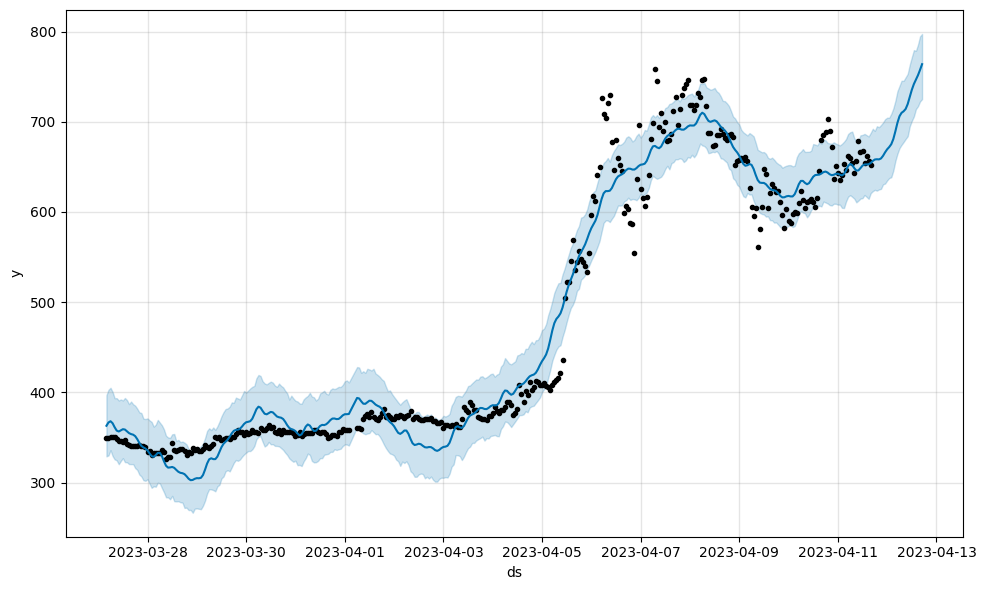

In [621]:
#그래프1
fig1 = model.plot(forecast)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


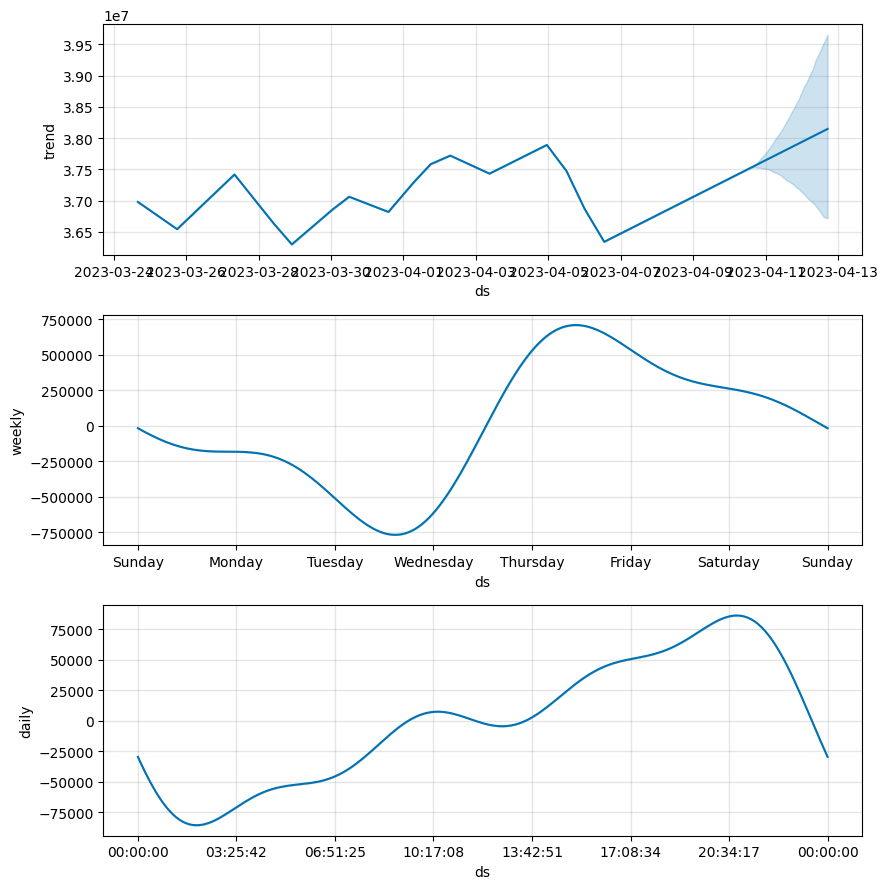

In [ ]:
 #그래프2
fig2 = model.plot_components(forecast)